# TASK 1 - Predict Restaurant Ratings

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Load the dataset

In [38]:
data = pd.read_csv('Dataset.csv') 

## Drop unnecessary columns

In [39]:
drop_columns = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose']
data = data.drop(columns=drop_columns)

## Encode categorical variables


In [40]:
label_encoders = {}
categorical_columns = ['Country Code', 'City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

## Splitting features and target


In [41]:
X = data.drop(columns=['Aggregate rating'])
y = data['Aggregate rating']

## Splitting into training and testing sets


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature scaling

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train models


In [44]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [45]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: MSE={mse:.4f}, R2={r2:.4f}')

Linear Regression: MSE=1.2915, R2=0.4326
Decision Tree: MSE=0.0560, R2=0.9754
Random Forest: MSE=0.0292, R2=0.9872


## Feature importance from Random Forest

In [46]:
rf = models['Random Forest']
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
Votes                   0.899914
Rating color            0.081057
Rating text             0.008355
Latitude                0.002897
Longitude               0.002831
Cuisines                0.002322
Average Cost for two    0.001556
Has Online delivery     0.000353
City                    0.000302
Price range             0.000221
Has Table booking       0.000115
Is delivering now       0.000027
Currency                0.000027
Country Code            0.000023
Switch to order menu    0.000000
dtype: float64


## Plot Aggregate Ratings (TASK COMPLETION)


In [50]:
print(data['Aggregate rating'].shape)  

(9551,)


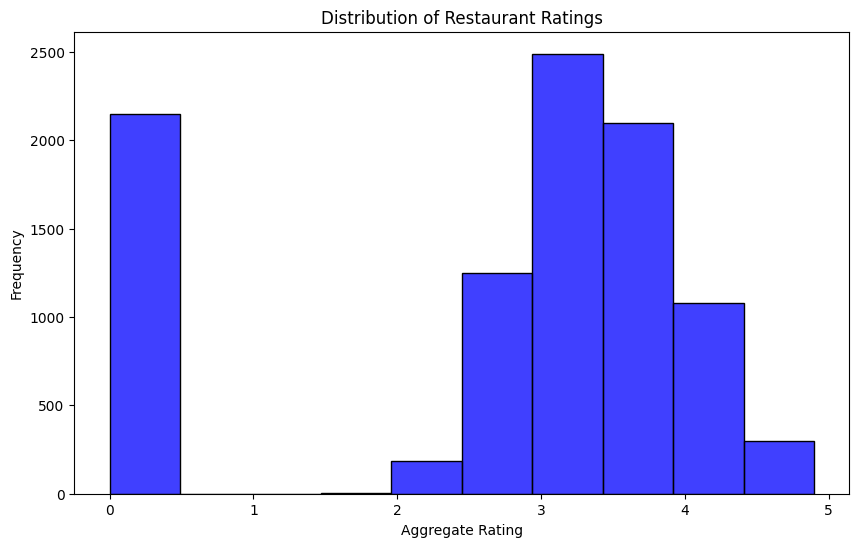

In [56]:
plt.figure(figsize=(10, 6))
data['Aggregate rating'] = pd.to_numeric(data['Aggregate rating'], errors='coerce')  
data = data.dropna(subset=['Aggregate rating']) 

sns.histplot(data['Aggregate rating'], bins=10, color='blue')

plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Restaurant Ratings")
plt.show()


## Plot Top 10 Restaurant Ratings (ADDITIONAL TASK)


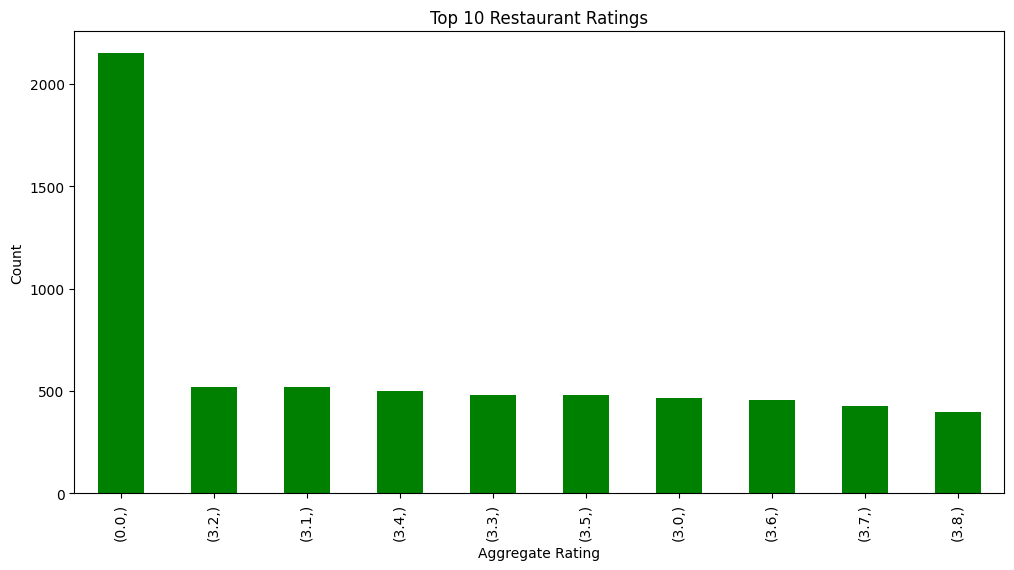

In [49]:
plt.figure(figsize=(12, 6))
top_ratings = data[['Aggregate rating']].value_counts().head(10)
top_ratings.plot(kind='bar', color='green')
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.title("Top 10 Restaurant Ratings")
plt.show()